In [3]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
#Display all the columns 
pd.set_option('display.max_columns',None)
# Display full length the column
pd.set_option('display.max_colwidth', -1)
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from string import punctuation
from nltk.stem.porter import *
from gensim.models import Word2Vec,KeyedVectors
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from spellchecker import SpellChecker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

df = pd.read_excel('Data1.xlsx')

In [4]:
df

Unnamed: 0                         OpportunityId OpportunityStageName  \
0       0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  Closed Won            
1       1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  Closed Won            
2       2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  Proposal              
3       3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  Proposal              
4       4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  Proposal              
5       5           000992B7-C04E-464A-A010-A2F3F9DCEF8B  Proposal              
6       6           00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
7       7           00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
8       8           00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
9       9           00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
10      10          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
11      11          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
12      12          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
13      13          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
14      14          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
15      15          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
16      16          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
17      17          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
18      18          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
19      19          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
20      20          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
21      21          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
22      22          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
23      23          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
24      24          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
25      25          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
26      26          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
27      27          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
28      28          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
29      29          00099CB6-D6A0-460E-85C1-96013DE68CA9  Closed Dead           
...     ..                                           ...           ...          
215606  215606      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215607  215607      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215608  215608      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215609  215609      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215610  215610      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215611  215611      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215612  215612      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215613  215613      FFF6636A-B629-47B3-B952-D338787BFBA0  Prospecting           
215614  215614      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215615  215615      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215616  215616      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215617  215617      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215618  215618      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215619  215619      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215620  215620      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215621  215621      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215622  215622      FFF8CB04-63DE-4588-986E-686BD696D82D  Closed Dead           
215623  215623      FFF8CB04-63DE-4588-

In [5]:
# data types of the features

df.dtypes

Unnamed: 0              int64 
OpportunityId           object
OpportunityStageName    object
ActivityDescription     object
dtype: object

In [6]:
df['OpportunityStageName'].value_counts()

Closed Dead           104599
Closed Won            60081 
Proposal              21097 
Prospecting           19563 
Closed Lost           7251  
Closed Happy Free     1205  
Evaluating            763   
Demonstration         451   
Negotiating           339   
Reversal              223   
Need  Analysis        36    
Lead Qualification    21    
Overdue               7     
Name: OpportunityStageName, dtype: int64

In [7]:
mapping = {'Closed Won' :0, 'Proposal':1, 'Closed Dead ':2, 'Evaluating':3,
       'Prospecting':4, 'Reversal':5, 'Closed Lost':6, 'Closed Happy Free':7,
       'Demonstration':8, 'Negotiating':9, 'Need  Analysis':10, 'Overdue':11,
       'Lead Qualification':12}

In [8]:
#Mapping OpportunityStageName column with mapping dictionary

df.replace({'OpportunityStageName': mapping},inplace=True)

In [9]:
df.head()

Unnamed: 0                         OpportunityId  OpportunityStageName  \
0  0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
1  1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
2  2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
3  3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
4  4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      

                                                                                                                                                                                                                                                                                                                                                                                                                              ActivityDescription  
0  #ProformaInvoice\r\nDear Sir,\r\n\r\nThanks for Order Confirmation.\r\nPlease find attached Proforma Invoices.\r\n\r\nWe request you to transfer the funds via NEFT on below bank details.\r\n\r\n\r\n\r\nPlease intimate once done.\r\n\r\nFeel free to mail us in case of any queries you may have.\r\nNote:-Payment will be 100% advance against Proforma Invoice.\r\n         \r\n\r\nThanks & Regards,\r\nAkshada Gaikwad\r\nInside Sales  
1  #Emailed\r\nDear Sir,\r\n\r\nPlease find revised Proforma Invoice.\r\n\r\nKindly make the payment we will let you know once the visit is schedule.\r\n\r\nThanks & Regards,\r\n\r\nAkshada Gaikwad\r\n\r\nQLC                                                                                                                                                                                                                                   
2  #Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n    Proposal : MailHosting\r\n    Feature Guide\r\n    Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.             
3  #Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings !!!\r\n\r\nWith reference to your discussion with Mr. Amol Kumbhar, please find attached proposal of EmailHosting Solution for The Jalna People's Co-Op Bank Ltd.-Jalna\r\n\r\n    Proposal : MailHosting\r\n    Feature Guide\r\n    Bank Client List\r\n\r\nIf you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nThank You.             
4  #Follow up\r\n\r\nCalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday

In [10]:
df.isnull().sum()

Unnamed: 0              0  
OpportunityId           0  
OpportunityStageName    0  
ActivityDescription     128
dtype: int64

In [11]:
# Search for missing values

def missing_values(dataframe):
    null_values = dataframe.isnull().sum()
    null_percent = dataframe.isnull().sum()/len(dataframe)*100
    null_df = pd.concat([null_values,null_percent],keys=['Value','Percent'],axis=1)
    return null_df

missing_values(df)

Value   Percent
Unnamed: 0            0      0.000000
OpportunityId         0      0.000000
OpportunityStageName  0      0.000000
ActivityDescription   128    0.059359

As we have only 0.05% data missing in the ActivityDescription column we are deleting that many records

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df

Unnamed: 0                         OpportunityId  \
0       0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0   
1       1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0   
2       2           000992B7-C04E-464A-A010-A2F3F9DCEF8B   
3       3           000992B7-C04E-464A-A010-A2F3F9DCEF8B   
4       4           000992B7-C04E-464A-A010-A2F3F9DCEF8B   
5       5           000992B7-C04E-464A-A010-A2F3F9DCEF8B   
6       6           00099CB6-D6A0-460E-85C1-96013DE68CA9   
7       7           00099CB6-D6A0-460E-85C1-96013DE68CA9   
8       8           00099CB6-D6A0-460E-85C1-96013DE68CA9   
9       9           00099CB6-D6A0-460E-85C1-96013DE68CA9   
10      10          00099CB6-D6A0-460E-85C1-96013DE68CA9   
11      11          00099CB6-D6A0-460E-85C1-96013DE68CA9   
12      12          00099CB6-D6A0-460E-85C1-96013DE68CA9   
13      13          00099CB6-D6A0-460E-85C1-96013DE68CA9   
14      14          00099CB6-D6A0-460E-85C1-96013DE68CA9   
15      15          00099CB6-D6A0-460E-85C1-96013DE68CA9   
16      16          00099CB6-D6A0-460E-85C1-96013DE68CA9   
17      17          00099CB6-D6A0-460E-85C1-96013DE68CA9   
18      18          00099CB6-D6A0-460E-85C1-96013DE68CA9   
19      19          00099CB6-D6A0-460E-85C1-96013DE68CA9   
20      20          00099CB6-D6A0-460E-85C1-96013DE68CA9   
21      21          00099CB6-D6A0-460E-85C1-96013DE68CA9   
22      22          00099CB6-D6A0-460E-85C1-96013DE68CA9   
23      23          00099CB6-D6A0-460E-85C1-96013DE68CA9   
24      24          00099CB6-D6A0-460E-85C1-96013DE68CA9   
25      25          00099CB6-D6A0-460E-85C1-96013DE68CA9   
26      26          00099CB6-D6A0-460E-85C1-96013DE68CA9   
27      27          00099CB6-D6A0-460E-85C1-96013DE68CA9   
28      28          00099CB6-D6A0-460E-85C1-96013DE68CA9   
29      29          00099CB6-D6A0-460E-85C1-96013DE68CA9   
...     ..                                           ...   
215606  215606      FFF6636A-B629-47B3-B952-D338787BFBA0   
215607  215607      FFF6636A-B629-47B3-B952-D338787BFBA0   
215608  215608      FFF6636A-B629-47B3-B952-D338787BFBA0   
215609  215609      FFF6636A-B629-47B3-B952-D338787BFBA0   
215610  215610      FFF6636A-B629-47B3-B952-D338787BFBA0   
215611  215611      FFF6636A-B629-47B3-B952-D338787BFBA0   
215612  215612      FFF6636A-B629-47B3-B952-D338787BFBA0   
215613  215613      FFF6636A-B629-47B3-B952-D338787BFBA0   
215614  215614      FFF8CB04-63DE-4588-986E-686BD696D82D   
215615  215615      FFF8CB04-63DE-4588-986E-686BD696D82D   
215616  215616      FFF8CB04-63DE-4588-986E-686BD696D82D   
215617  215617      FFF8CB04-63DE-4588-986E-686BD696D82D   
215618  215618      FFF8CB04-63DE-4588-986E-686BD696D82D   
215619  215619      FFF8CB04-63DE-4588-986E-686BD696D82D   
215620  215620      FFF8CB04-63DE-4588-986E-686BD696D82D   
215621  215621      FFF8CB04-63DE-4588-986E-686BD696D82D   
215622  215622      FFF8CB04-63DE-4588-986E-686BD696D82D   
215623  215623      FFF8CB04-63DE-4588-986E-686BD696D82D   
215624  215624      FFF92F99-0D5A-40F8-B192-60B04DA1E02A   
215625  215625      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215626  215626      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215627  215627      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215628  215628      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215629  215629      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215630  215630      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215631  215631      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215632  215632      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215633  215633      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215634  215634      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   
215635  215635      FFF9D8FB-8F8D-4FC8-811D-03E27587BA61   

        OpportunityStageName  \
0       0                      
1       0                      
2       1                      
3       1                      
4       1                      
5       1                      
6       2                      
7       2                      

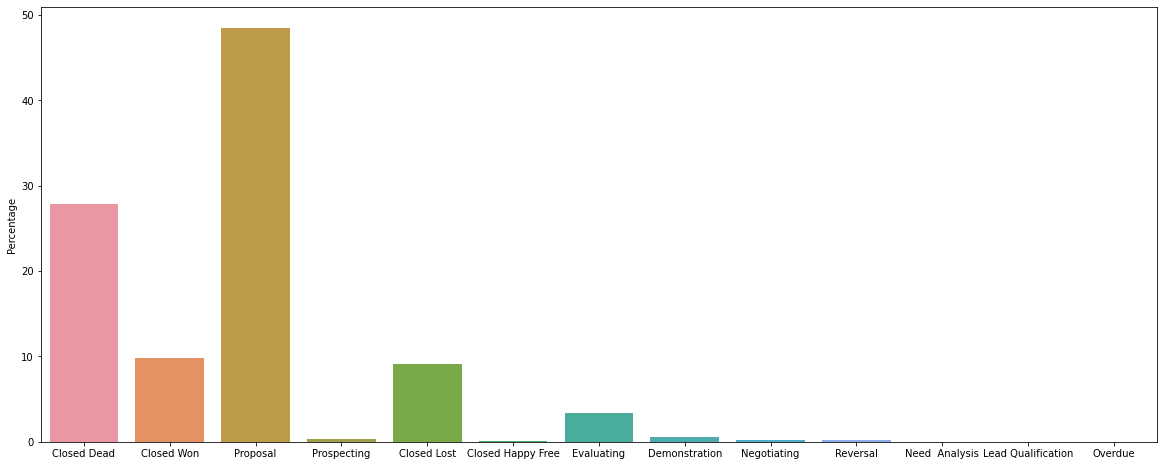

In [14]:
# Plotting distribution of target

fig, ax = plt.subplots(figsize=(20, 8))
counts = df.OpportunityStageName.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Closed Dead', 'Closed Won', 'Proposal', 'Prospecting','Closed Lost','Closed Happy Free','Evaluating','Demonstration','Negotiating','Reversal','Need  Analysis','Lead Qualification','Overdue'])
ax.set_ylabel("Percentage")
plt.show()

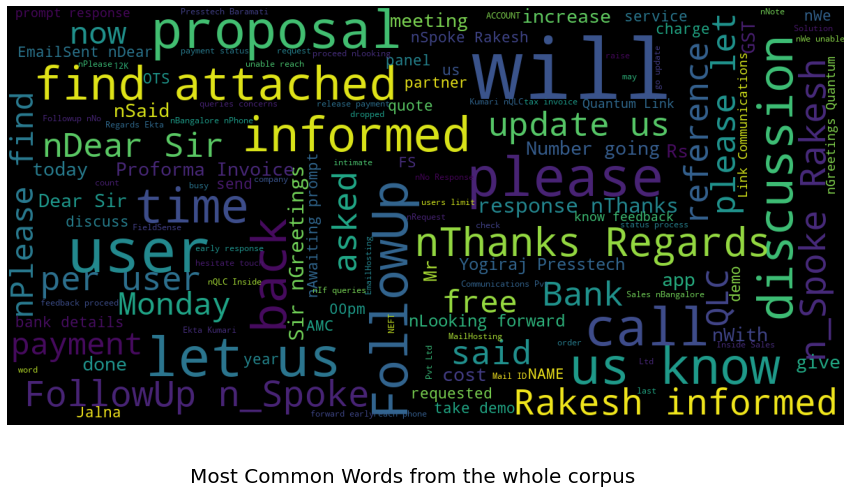

In [15]:
# WordCLoud for most common words

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=10000,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['ActivityDescription'],'Most Common Words from the whole corpus')

In [16]:
# Lowering the text in ActivityDescription column

df['ActivityDescription']  = df['ActivityDescription'].str.lower()
df.head()

Unnamed: 0                         OpportunityId  OpportunityStageName  \
0  0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
1  1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
2  2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
3  3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
4  4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      

                                                                                                                                                                                                                                                                                                                                                                                                                              ActivityDescription  
0  #proformainvoice\r\ndear sir,\r\n\r\nthanks for order confirmation.\r\nplease find attached proforma invoices.\r\n\r\nwe request you to transfer the funds via neft on below bank details.\r\n\r\n\r\n\r\nplease intimate once done.\r\n\r\nfeel free to mail us in case of any queries you may have.\r\nnote:-payment will be 100% advance against proforma invoice.\r\n         \r\n\r\nthanks & regards,\r\nakshada gaikwad\r\ninside sales  
1  #emailed\r\ndear sir,\r\n\r\nplease find revised proforma invoice.\r\n\r\nkindly make the payment we will let you know once the visit is schedule.\r\n\r\nthanks & regards,\r\n\r\nakshada gaikwad\r\n\r\nqlc                                                                                                                                                                                                                                   
2  #proposal\r\n\r\ndear ma'am,\r\n\r\ngreetings !!!\r\n\r\nwith reference to your discussion with mr. amol kumbhar, please find attached proposal of emailhosting solution for the jalna people's co-op bank ltd.-jalna\r\n\r\n    proposal : mailhosting\r\n    feature guide\r\n    bank client list\r\n\r\nif you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nthank you.             
3  #proposal\r\n\r\ndear ma'am,\r\n\r\ngreetings !!!\r\n\r\nwith reference to your discussion with mr. amol kumbhar, please find attached proposal of emailhosting solution for the jalna people's co-op bank ltd.-jalna\r\n\r\n    proposal : mailhosting\r\n    feature guide\r\n    bank client list\r\n\r\nif you have any further queries or concerns, please do not hesitate to get in touch with us.\r\n\r\n \r\n\r\nthank you.             
4  #follow up\r\n\r\ncalled on landline number\r\ndiscussed regaring proposal\r\nsaid she is on leave \r\nwill be back on monday

In [17]:
# Set of emoticons 

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [18]:
# function to convert nltk tag to wordnet tag

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [19]:
# Function to tokenize, add pos_tag and lemmatize the tweets

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    nltk_tagged = nltk.pos_tag(tokenizer.tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
          if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
                #tweet = str(TextBlob(word).correct())                
                if tag is None:
                    #if there is no available tag, append the token as is
                    lemmatized_sentence.append(word)
                else:        
                    #else use the tag to lemmatize the token
                    lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)   

In [20]:
# Function to clean regex from tweets

def clean_tweets(tweet):    
    # remove numbers
    tweet = tweet.lower()
    tweet = re.sub(r'\d+', '', tweet)
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^rt[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    return lemmatize_sentence(tweet)

In [21]:
# Applying clean_tweets function to ActivityDescription column

df['ActivityDescription'] = df.apply(lambda row: clean_tweets(str(row['ActivityDescription'])), axis=1)
df.head()

Unnamed: 0                         OpportunityId  OpportunityStageName  \
0  0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
1  1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
2  2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
3  3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
4  4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      

                                                                                                                                                                                                                                                       ActivityDescription  
0  proformainvoice dear sir thanks order confirmation please find attached proforma invoice request transfer fund via neft bank detail please intimate do feel free mail us case query may note payment advance proforma invoice thanks regard akshada gaikwad inside sale  
1  email dear sir please find revised proforma invoice kindly make payment let know visit schedule thanks regard akshada gaikwad qlc                                                                                                                                        
2  proposal dear greeting reference discussion mr amol kumbhar please find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern please hesitate get touch us thank                   
3  proposal dear greeting reference discussion mr amol kumbhar please find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern please hesitate get touch us thank                   
4  follow call landline number discuss regaring proposal say leave back monday

In [22]:
# Top 10 most frequent words

most_freq_words = pd.Series(' '.join(df['ActivityDescription']).split()).value_counts()[:10]
most_freq_words = list(most_freq_words.index)
print("Most Frequent Words")
print(most_freq_words)


df['ActivityDescription'] = df['ActivityDescription'].apply(lambda x: " ".join(x for x in x.split() if x not in most_freq_words))

df.head()

Most Frequent Words
['call', 'us', 'say', 'mr', 'please', 'followup', 'dear', 'qlc', 'ask', 'regard']


Unnamed: 0                         OpportunityId  OpportunityStageName  \
0  0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
1  1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
2  2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
3  3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
4  4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      

                                                                                                                                                                                                                          ActivityDescription  
0  proformainvoice sir thanks order confirmation find attached proforma invoice request transfer fund via neft bank detail intimate do feel free mail case query may note payment advance proforma invoice thanks akshada gaikwad inside sale  
1  email sir find revised proforma invoice kindly make payment let know visit schedule thanks akshada gaikwad                                                                                                                                  
2  proposal greeting reference discussion amol kumbhar find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern hesitate get touch thank               
3  proposal greeting reference discussion amol kumbhar find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern hesitate get touch thank               
4  follow landline number discuss regaring proposal leave back monday

In [23]:
from html.parser import HTMLParser
html = HTMLParser()

In [24]:
# Created a new columns i.e. ActivityDescription_html which do not contain html tags 

df['ActivityDescription'] = df['ActivityDescription'].apply(lambda x: html.unescape(x))
df.head()

Unnamed: 0                         OpportunityId  OpportunityStageName  \
0  0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
1  1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
2  2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
3  3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
4  4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      

                                                                                                                                                                                                                          ActivityDescription  
0  proformainvoice sir thanks order confirmation find attached proforma invoice request transfer fund via neft bank detail intimate do feel free mail case query may note payment advance proforma invoice thanks akshada gaikwad inside sale  
1  email sir find revised proforma invoice kindly make payment let know visit schedule thanks akshada gaikwad                                                                                                                                  
2  proposal greeting reference discussion amol kumbhar find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern hesitate get touch thank               
3  proposal greeting reference discussion amol kumbhar find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern hesitate get touch thank               
4  follow landline number discuss regaring proposal leave back monday

In [25]:
# Least Frequent Words

least_freq_words = pd.Series(' '.join(df['ActivityDescription']).split()).value_counts()[-2994:]
least_freq_words = list(least_freq_words.index)
print("Least Frequent Words")
print(least_freq_words)

df['ActivityDescription'] = df['ActivityDescription'].apply(lambda x: " ".join(x for x in x.split() if x not in least_freq_words))


Least Frequent Words
['bizpro', 'dragedrop', 'comminicated', 'coonect', 'kra', 'vicent', 'sulgana', 'rameshkattiri', 'signiing', 'attenance', 'veritus', 'muli', 'diretors', 'vjunnar', 'vivil', 'priorities', 'ramit', 'danthi', 'kunkolikar', 'mobilenumber', 'relex', 'firth', 'seetharaman', 'conttract', 'isuue', 'lailita', 'adityabirla', 'repository', 'sincerity', 'sorrey', 'madhan', 'shrinivasan', 'chidfund', 'aniktantra', 'veccation', 'ubin', 'advan', 'diplomat', 'oir', 'shirnath', 'kumal', 'inturpted', 'srini', 'kmn', 'boda', 'direactor', 'incoimingmail', 'followupfor', 'mddemo', 'aeril', 'mudasar', 'represnattive', 'cakks', 'withought', 'notrechbale', 'synergyg', 'dongra', 'briota', 'muralidharan', 'explainedabout', 'hus', 'adter', 'facilty', 'ytete', 'nikhilsambhav', 'hitec', 'toucgh', 'clasik', 'aradhika', 'trocko', 'kdogjnolnlepaffc', 'adjsut', 'gurmani', 'papl', 'loke', 'tomes', 'rakjumar', 'mosaic', 'triumph', 'balbirji', 'quited', 'shabarimalai', 'fell', 'collabrate', 'registeri

In [26]:
df.head()

Unnamed: 0                         OpportunityId  OpportunityStageName  \
0  0           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
1  1           0006255A-A476-4DEF-9C67-0E4B0A83ACD0  0                      
2  2           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
3  3           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      
4  4           000992B7-C04E-464A-A010-A2F3F9DCEF8B  1                      

                                                                                                                                                                                                                          ActivityDescription  
0  proformainvoice sir thanks order confirmation find attached proforma invoice request transfer fund via neft bank detail intimate do feel free mail case query may note payment advance proforma invoice thanks akshada gaikwad inside sale  
1  email sir find revised proforma invoice kindly make payment let know visit schedule thanks akshada gaikwad                                                                                                                                  
2  proposal greeting reference discussion amol kumbhar find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern hesitate get touch thank               
3  proposal greeting reference discussion amol kumbhar find attached proposal emailhosting solution jalna people co op bank ltd jalna proposal mailhosting feature guide bank client list query concern hesitate get touch thank               
4  follow landline number discuss regaring proposal leave back monday

## EDA

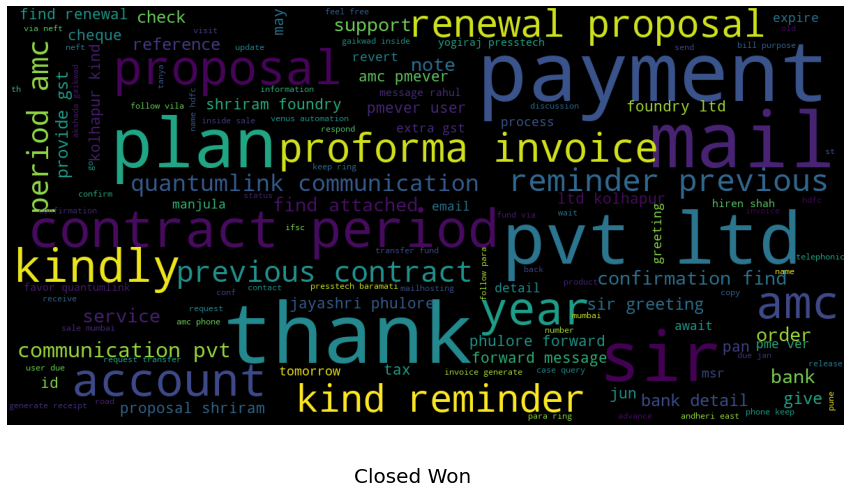

In [27]:
show_wordcloud(df[df['OpportunityStageName'] == 0]['ActivityDescription'],'Closed Won')

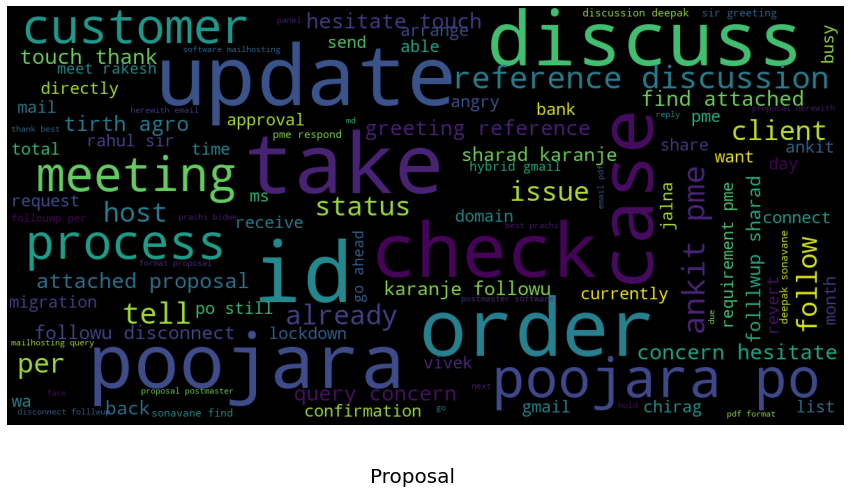

In [28]:
show_wordcloud(df[df['OpportunityStageName'] == 1]['ActivityDescription'],'Proposal')

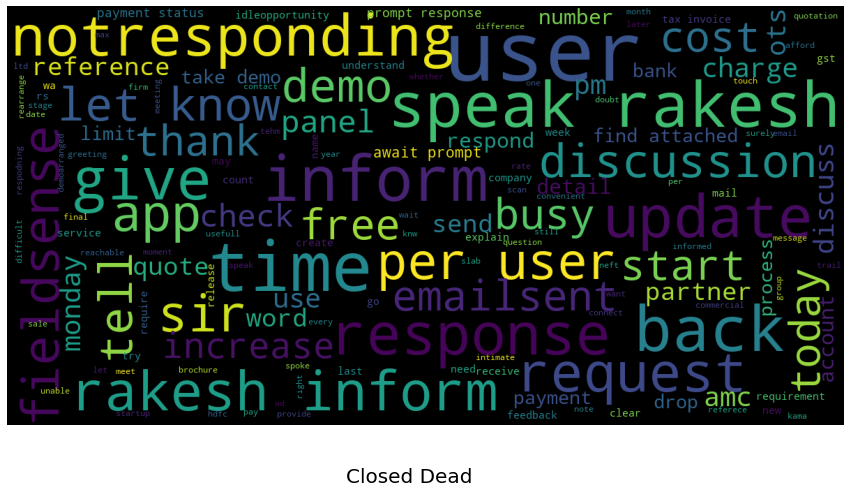

In [29]:
show_wordcloud(df[df['OpportunityStageName'] == 2]['ActivityDescription'],'Closed Dead ')

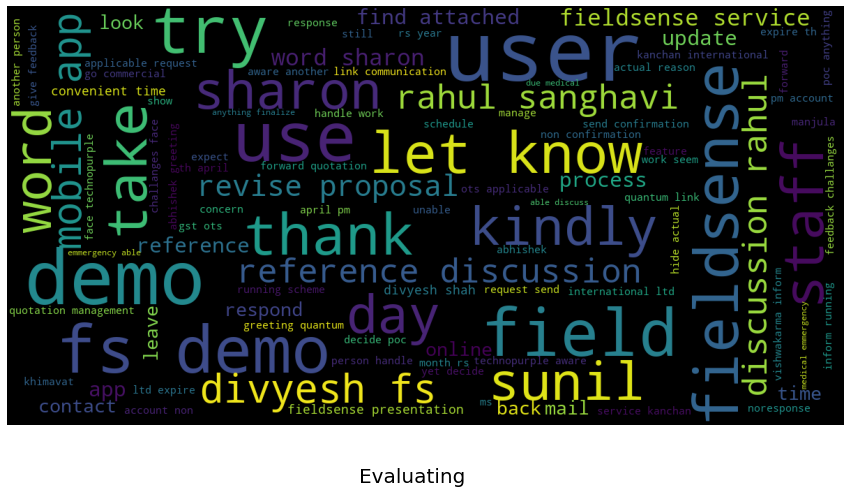

In [30]:
show_wordcloud(df[df['OpportunityStageName'] == 3]['ActivityDescription'],'Evaluating')

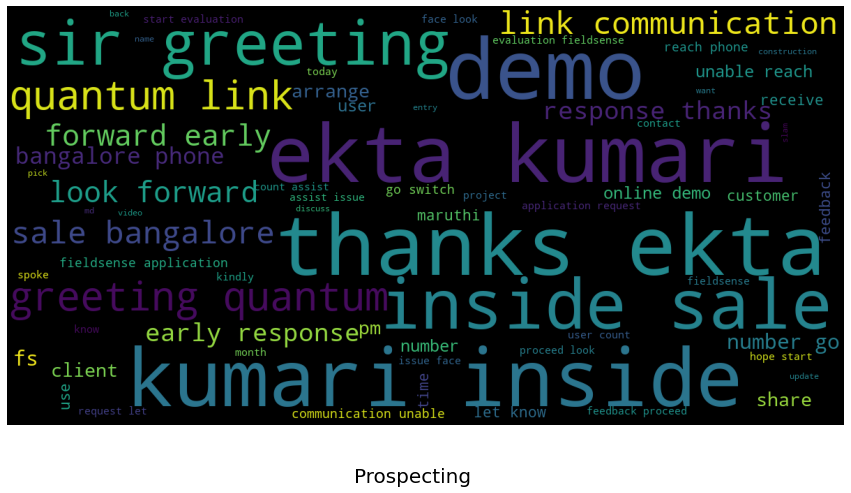

In [31]:
show_wordcloud(df[df['OpportunityStageName'] == 4]['ActivityDescription'],'Prospecting')

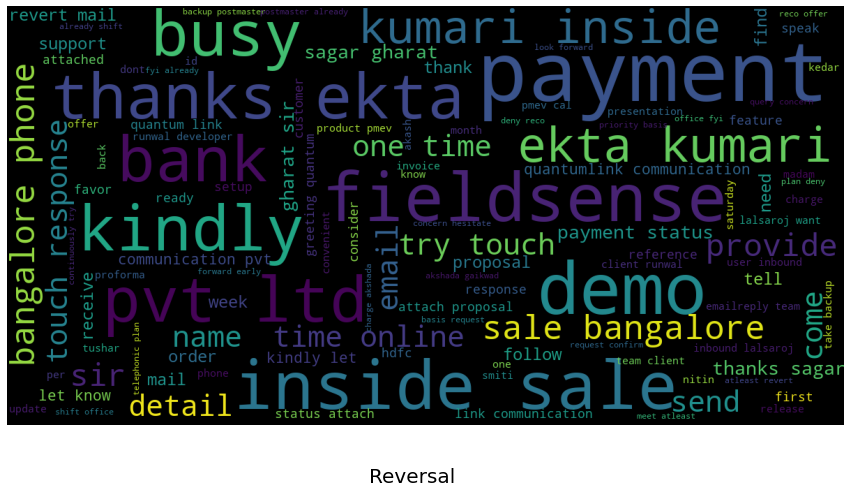

In [32]:
show_wordcloud(df[df['OpportunityStageName'] == 5]['ActivityDescription'],'Reversal')

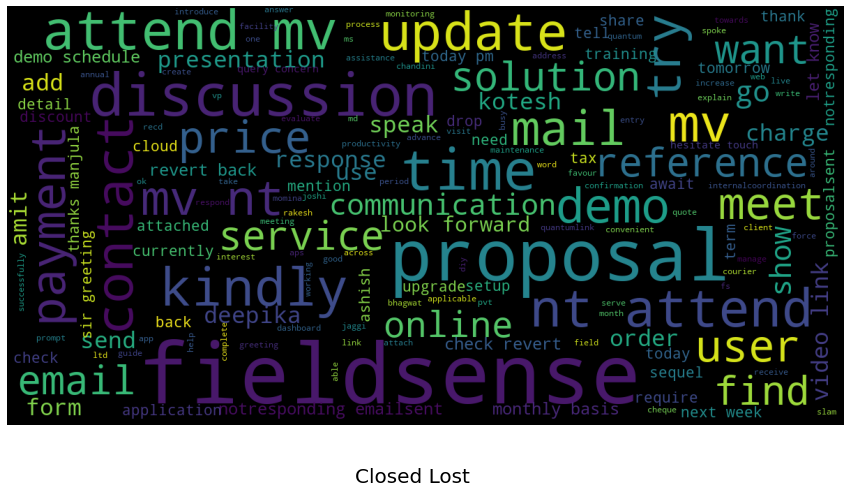

In [33]:
show_wordcloud(df[df['OpportunityStageName'] == 6]['ActivityDescription'],'Closed Lost')

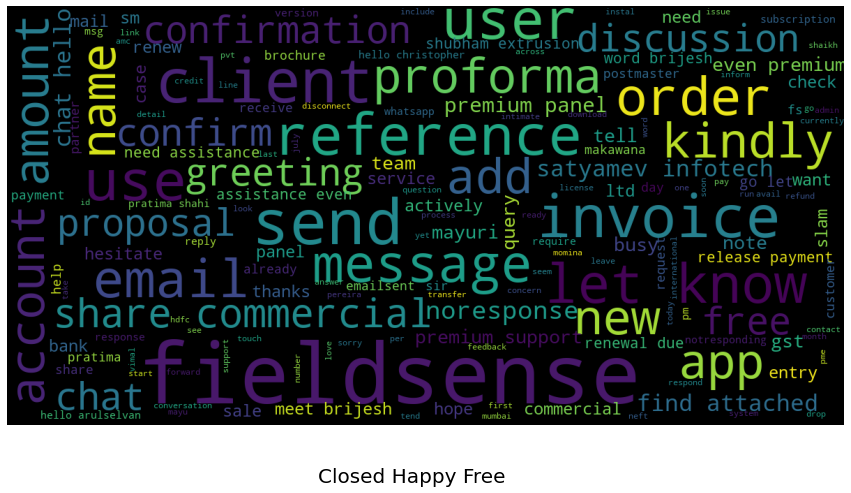

In [34]:
show_wordcloud(df[df['OpportunityStageName'] == 7]['ActivityDescription'],'Closed Happy Free')

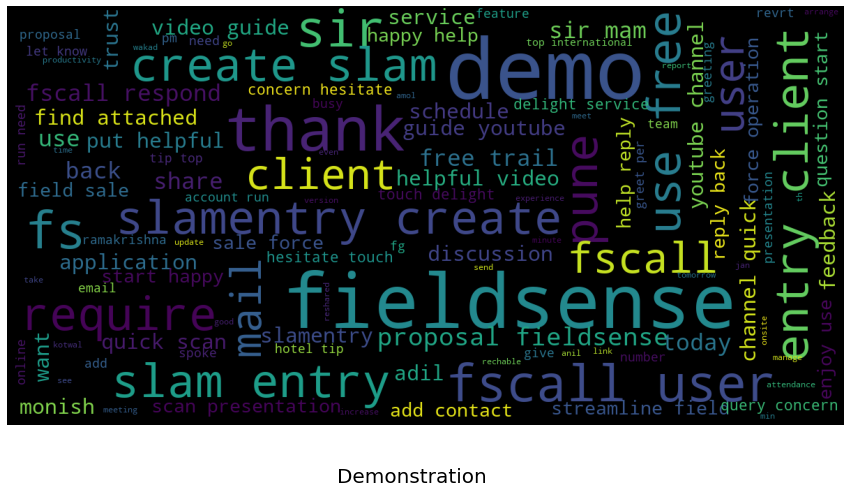

In [35]:
show_wordcloud(df[df['OpportunityStageName'] == 8]['ActivityDescription'],'Demonstration')

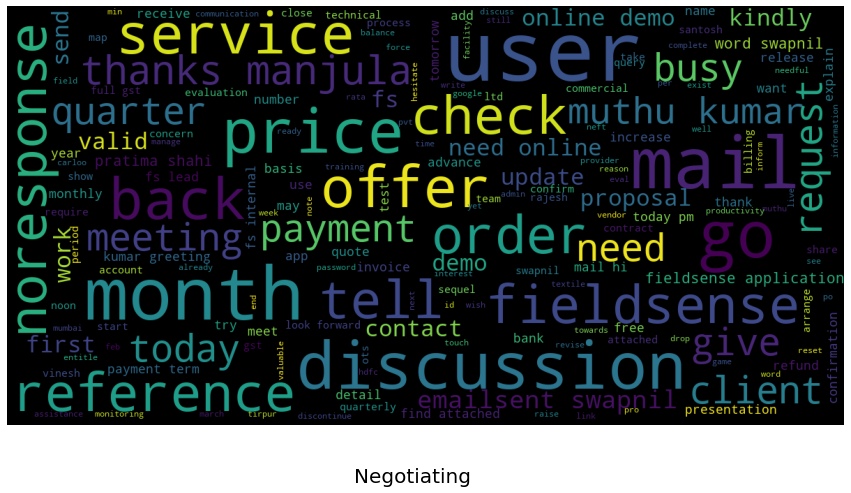

In [36]:
show_wordcloud(df[df['OpportunityStageName'] == 9]['ActivityDescription'],'Negotiating')

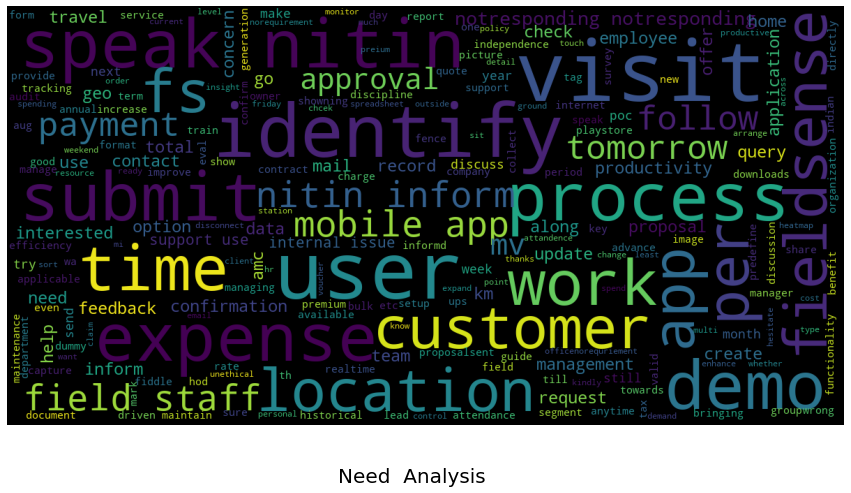

In [37]:
show_wordcloud(df[df['OpportunityStageName'] == 10]['ActivityDescription'],'Need  Analysis')

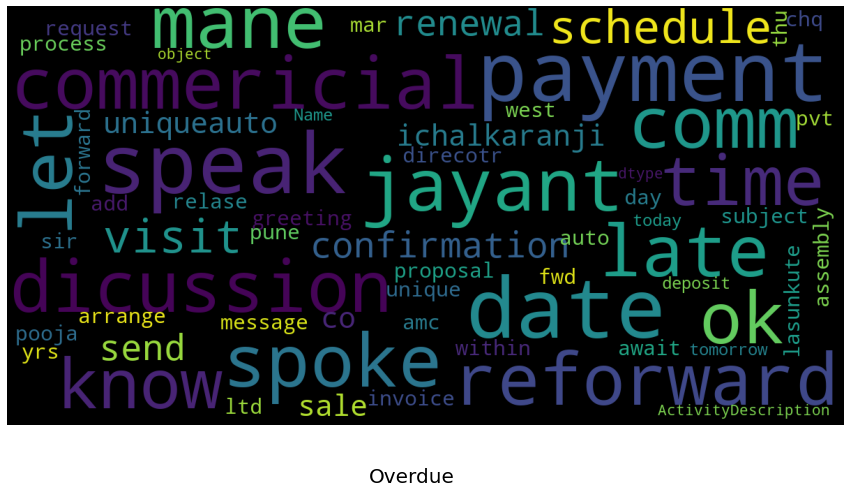

In [38]:
show_wordcloud(df[df['OpportunityStageName'] == 11]['ActivityDescription'],'Overdue')

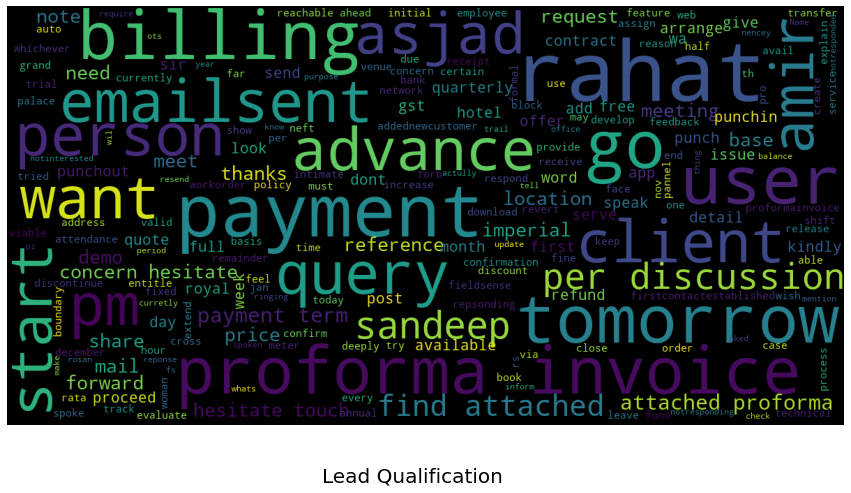

In [39]:
show_wordcloud(df[df['OpportunityStageName'] == 12]['ActivityDescription'],'Lead Qualification')

## Feature Extraction

In [40]:
# Applying Count Vectorization

bow = CountVectorizer(lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['ActivityDescription'])
train_bow

<215508x30951 sparse matrix of type '<class 'numpy.int64'>'
	with 2946085 stored elements in Compressed Sparse Row format>

In [41]:
# Applying TF-IDF Vectorization

tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english', ngram_range=(1,1))
train_tfidf = tfidf.fit_transform(df['ActivityDescription'])
train_tfidf

<215508x30764 sparse matrix of type '<class 'numpy.float64'>'
	with 2663593 stored elements in Compressed Sparse Row format>

In [42]:
# Splitting into features and targets 

from sklearn.model_selection import train_test_split  

X = train_tfidf
y = df['OpportunityStageName']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test,y_pred_lr))  
print(classification_report(y_test,y_pred_lr))  
print(accuracy_score(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr,average='weighted'))

[[11143   356  6327     0   201     0    19     0     0     0     0     0
      0]
 [  889  1974  3458     0   128     0     1     0     0     0     0     0
      0]
 [ 2945   522 27157     2   520     0    23     4     0     0     0     0
      0]
 [   28    15   134    37    10     0     0     0     0     0     0     0
      0]
 [  320    99  3807     0  1716     0     6     2     0     0     0     0
      0]
 [    5     5    34     0    12     0     6     0     0     0     0     0
      0]
 [  440    40  1343     0   152     0   164     2     0     0     0     0
      0]
 [   24     5   292     0    13     0     0    18     0     0     0     0
      0]
 [    4     2   122     0     6     0     0     0     0     0     0     0
      0]
 [   18     0    85     0     4     0     0     0     0     0     0     0
      0]
 [    0     1     5     0     0     0     0     0     0     0     0     0
      0]
 [    3     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  

In [44]:
# Naive Bayes Multinomial Model

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
 
print(confusion_matrix(y_test,y_pred_nb))  
print(classification_report(y_test,y_pred_nb))  
print(accuracy_score(y_test, y_pred_nb))
print(f1_score(y_test, y_pred_nb,average='weighted'))

[[10411    38  7545     0    52     0     0     0     0     0     0     0
      0]
 [ 1024   735  4632     0    59     0     0     0     0     0     0     0
      0]
 [ 2925    40 28096     0   112     0     0     0     0     0     0     0
      0]
 [   30     5   188     0     1     0     0     0     0     0     0     0
      0]
 [  271    13  4876     0   790     0     0     0     0     0     0     0
      0]
 [    8     0    41     0    13     0     0     0     0     0     0     0
      0]
 [  407     3  1656     0    70     0     5     0     0     0     0     0
      0]
 [   17     0   335     0     0     0     0     0     0     0     0     0
      0]
 [    5     2   125     0     2     0     0     0     0     0     0     0
      0]
 [   16     0    91     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     6     0     0     0     0     0     0     0     0     0
      0]
 [    3     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  

In [45]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rfc))  
print(classification_report(y_test,y_pred_rfc))  
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc,average='weighted'))

[[13545   131  4221     1   122     0    24     0     2     0     0     0
      0]
 [  448  3570  2302     2   110     0    12     0     6     0     0     0
      0]
 [ 2076   233 28388     2   407     1    51    14     1     0     0     0
      0]
 [   23     7    76   106    12     0     0     0     0     0     0     0
      0]
 [  166    97  3384     2  2281     1    12     4     3     0     0     0
      0]
 [    6     3    25     0     9    19     0     0     0     0     0     0
      0]
 [  282    28   964     0   103     0   764     0     0     0     0     0
      0]
 [    9     6   223     0     9     0     0   105     0     0     0     0
      0]
 [    1     9   104     0    13     0     0     0     7     0     0     0
      0]
 [   11     2    51     0     3     0     0     0     0    40     0     0
      0]
 [    0     0     5     0     0     0     0     0     0     0     1     0
      0]
 [    2     0     0     0     0     0     0     0     0     0     0     1
      0]
 [  

In [46]:
# Support vector classifier

from sklearn.svm import SVC  
svm_lin = SVC(kernel='linear', random_state=0)


svm_lin.fit(X_train,y_train)
y_pred_svm_lin = svm_lin.predict(X_test)
print(confusion_matrix(y_test,y_pred_svm_lin))  
print(classification_report(y_test,y_pred_svm_lin))  
print(accuracy_score(y_test, y_pred_svm_lin))
print(f1_score(y_test, y_pred_svm_lin,average='weighted'))

[[11195   280  6416     2   143     0     9     1     0     0     0     0
      0]
 [  810  2154  3392     0    92     0     0     0     2     0     0     0
      0]
 [ 2555   351 27885     7   342     1    19     7     1     5     0     0
      0]
 [   21     7   126    65     5     0     0     0     0     0     0     0
      0]
 [  257    69  4016     0  1607     0     0     1     0     0     0     0
      0]
 [    4     3    41     0    11     3     0     0     0     0     0     0
      0]
 [  380    32  1366     1   113     0   249     0     0     0     0     0
      0]
 [   15     6   282     0     5     0     0    44     0     0     0     0
      0]
 [    5     3   120     0     4     0     0     0     2     0     0     0
      0]
 [   18     0    74     0     2     0     0     0     0    13     0     0
      0]
 [    1     0     5     0     0     0     0     0     0     0     0     0
      0]
 [    2     0     0     0     0     0     0     0     0     0     0     1
      0]
 [  

In [47]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
print(confusion_matrix(y_test,y_pred_sgd))  
print(classification_report(y_test,y_pred_sgd))  
print(accuracy_score(y_test, y_pred_sgd))
print(f1_score(y_test, y_pred_sgd,average='weighted'))

[[11014   223  6641     0   161     0     6     1     0     0     0     0
      0]
 [  898  1625  3806     0   120     0     0     0     1     0     0     0
      0]
 [ 2799   284 27714     1   367     0     4     2     1     1     0     0
      0]
 [   25     8   143    44     4     0     0     0     0     0     0     0
      0]
 [  288    54  4056     0  1549     0     1     2     0     0     0     0
      0]
 [    7     1    36     0    18     0     0     0     0     0     0     0
      0]
 [  429    20  1445     1   122     0   124     0     0     0     0     0
      0]
 [   15     2   309     0     7     0     0    19     0     0     0     0
      0]
 [    3     2   123     0     5     0     0     0     1     0     0     0
      0]
 [   15     0    85     0     4     0     0     0     0     3     0     0
      0]
 [    0     0     6     0     0     0     0     0     0     0     0     0
      0]
 [    3     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  

In [48]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred_knn))  
print(classification_report(y_test,y_pred_knn))  
print(accuracy_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn,average='weighted'))

[[12704   414  4636     4   209     0    74     5     0     0     0     0
      0]
 [ 1453  2662  2126     2   184     0    20     1     2     0     0     0
      0]
 [ 6426  1008 22904    10   669     3   134    12     3     4     0     0
      0]
 [   63    14    91    44    10     0     2     0     0     0     0     0
      0]
 [ 1281   251  2574     5  1813     0    23     2     1     0     0     0
      0]
 [   16     5    17     0    18     6     0     0     0     0     0     0
      0]
 [  702    92   893     1   119     0   334     0     0     0     0     0
      0]
 [   71    13   227     0    14     0     0    27     0     0     0     0
      0]
 [   26    12    80     0    15     0     0     0     1     0     0     0
      0]
 [   35     9    51     0     1     0     0     0     0    11     0     0
      0]
 [    2     2     2     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     3     0     0     0     0     0     0     0     0     0
      0]
 [  

In [49]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
print(confusion_matrix(y_test,y_pred_ada))  
print(classification_report(y_test,y_pred_ada))  
print(accuracy_score(y_test, y_pred_ada))
print(f1_score(y_test, y_pred_ada,average='weighted'))

[[ 4626     0 13420     0     0     0     0     0     0     0     0     0
      0]
 [  433     0  6017     0     0     0     0     0     0     0     0     0
      0]
 [ 1791     0 29382     0     0     0     0     0     0     0     0     0
      0]
 [   12     0   212     0     0     0     0     0     0     0     0     0
      0]
 [  180     0  5770     0     0     0     0     0     0     0     0     0
      0]
 [    3     0    59     0     0     0     0     0     0     0     0     0
      0]
 [  151     0  1990     0     0     0     0     0     0     0     0     0
      0]
 [   14     0   338     0     0     0     0     0     0     0     0     0
      0]
 [    3     0   131     0     0     0     0     0     0     0     0     0
      0]
 [   13     0    94     0     0     0     0     0     0     0     0     0
      0]
 [    1     0     5     0     0     0     0     0     0     0     0     0
      0]
 [    2     0     0     0     0     0     0     0     0     0     0     1
      0]
 [  

In [50]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.486
Accuracy score (validation): 0.482
Learning rate:  0.075
Accuracy score (training): 0.486
Accuracy score (validation): 0.482
Learning rate:  0.1
Accuracy score (training): 0.486
Accuracy score (validation): 0.482
Learning rate:  0.25
Accuracy score (training): 0.487
Accuracy score (validation): 0.483
Learning rate:  0.5
Accuracy score (training): 0.487
Accuracy score (validation): 0.483
Learning rate:  0.75
Accuracy score (training): 0.488
Accuracy score (validation): 0.483
Learning rate:  1
Accuracy score (training): 0.488
Accuracy score (validation): 0.483


In [51]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[   85     1 17930     0    13     0     1     2     7     7     0     0
      0]
 [    8    19  6421     0     1     0     0     0     1     0     0     0
      0]
 [   41     1 31084     0    22     0     0     3    19     3     0     0
      0]
 [    0     0   224     0     0     0     0     0     0     0     0     0
      0]
 [   11     0  5886     0    48     0     0     1     0     4     0     0
      0]
 [    0     0    62     0     0     0     0     0     0     0     0     0
      0]
 [    2     0  2136     0     1     0     1     0     1     0     0     0
      0]
 [    0     0   352     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   133     0     1     0     0     0     0     0     0     0
      0]
 [    1     0   105     0     1     0     0     0     0     0     0     0
      0]
 [    0     0     6     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     3     0     0     0     0     0     0     0     0  

In [53]:
# XGBClassifier

import xgboost as XGBClassifier
xgb_clf=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_clf.fit(X_train, y_train)
y_pred_xgb_clf = xgb_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_xgb_clf))  
print(classification_report(y_test,y_pred_xgb_clf))  
print(accuracy_score(y_test, y_pred_xgb_clf))
print(f1_score(y_test, y_pred_xgb_clf,average='weighted'))

<IPython.core.display.Javascript object>

[[ 6121    28 11873     0    24     0     0     0     0     0     0     0
      0]
 [  550   195  5663     0    41     0     0     0     1     0     0     0
      0]
 [ 1739    33 29295     2    99     1     0     2     1     1     0     0
      0]
 [   10     0   168    44     2     0     0     0     0     0     0     0
      0]
 [  143     1  5356     0   450     0     0     0     0     0     0     0
      0]
 [    4     1    50     0     4     3     0     0     0     0     0     0
      0]
 [  158     0  1888     0    57     2    36     0     0     0     0     0
      0]
 [    5     0   324     0     0     0     0    23     0     0     0     0
      0]
 [    3     0   127     0     2     0     0     0     2     0     0     0
      0]
 [   14     0    89     0     0     0     0     0     0     4     0     0
      0]
 [    0     0     6     0     0     0     0     0     0     0     0     0
      0]
 [    2     0     1     0     0     0     0     0     0     0     0     0
      0]
 [  